In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
len(words)

32033

In [4]:
max(len(w) for w in words)

15

In [5]:
b = {}
for w in words:
    chs = ["<S>"] + list(w) + ["</E>"]
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [6]:
sorted(b.items(), key = lambda kv: kv[1] )

[(('q', 'r'), 1),
 (('d', 'z'), 1),
 (('p', 'j'), 1),
 (('q', 'l'), 1),
 (('p', 'f'), 1),
 (('q', 'e'), 1),
 (('b', 'c'), 1),
 (('c', 'd'), 1),
 (('m', 'f'), 1),
 (('p', 'n'), 1),
 (('w', 'b'), 1),
 (('p', 'c'), 1),
 (('h', 'p'), 1),
 (('f', 'h'), 1),
 (('b', 'j'), 1),
 (('f', 'g'), 1),
 (('z', 'g'), 1),
 (('c', 'p'), 1),
 (('p', 'k'), 1),
 (('p', 'm'), 1),
 (('x', 'n'), 1),
 (('s', 'q'), 1),
 (('k', 'f'), 1),
 (('m', 'k'), 1),
 (('x', 'h'), 1),
 (('g', 'f'), 1),
 (('v', 'b'), 1),
 (('j', 'p'), 1),
 (('g', 'z'), 1),
 (('v', 'd'), 1),
 (('d', 'b'), 1),
 (('v', 'h'), 1),
 (('h', 'h'), 1),
 (('g', 'v'), 1),
 (('d', 'q'), 1),
 (('x', 'b'), 1),
 (('w', 'z'), 1),
 (('h', 'q'), 1),
 (('j', 'b'), 1),
 (('x', 'm'), 1),
 (('w', 'g'), 1),
 (('t', 'b'), 1),
 (('z', 'x'), 1),
 (('p', 'b'), 2),
 (('t', 'g'), 2),
 (('q', 's'), 2),
 (('t', 'x'), 2),
 (('f', 'k'), 2),
 (('b', 't'), 2),
 (('j', 'n'), 2),
 (('k', 'c'), 2),
 (('z', 'k'), 2),
 (('s', 'j'), 2),
 (('s', 'f'), 2),
 (('z', 'j'), 2),
 (('n', 'q

In [7]:
import torch

In [8]:
N = torch.zeros((27,27), dtype=torch.int32)

In [9]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [10]:
p = N.float()
P = p/p.sum()

In [11]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
    

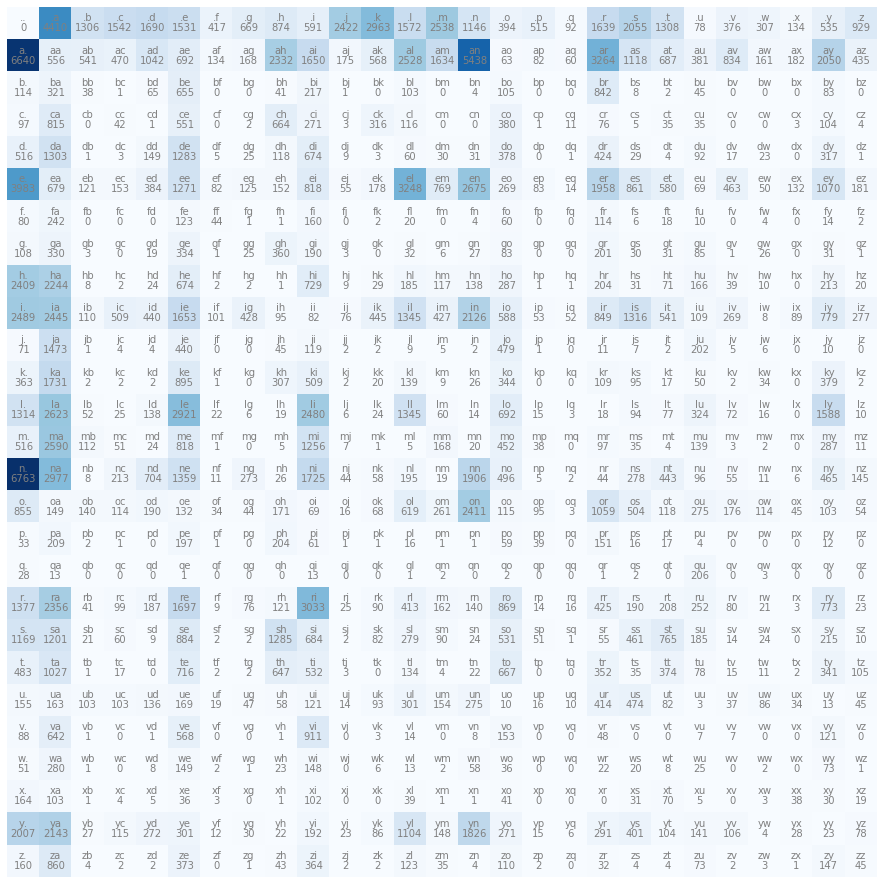

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [13]:
N[0,:].float()

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])

In [43]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'n'

In [15]:
p = N.float()
P = p/p.sum()

In [16]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [17]:
torch.multinomial(p, num_samples=1, replacement=True, generator=g)

tensor([1])

In [18]:
P.shape

torch.Size([27, 27])

In [19]:
P.sum(1, keepdim=True)

tensor([[0.1404],
        [0.1485],
        [0.0116],
        [0.0155],
        [0.0241],
        [0.0895],
        [0.0040],
        [0.0084],
        [0.0334],
        [0.0776],
        [0.0127],
        [0.0221],
        [0.0612],
        [0.0291],
        [0.0803],
        [0.0348],
        [0.0045],
        [0.0012],
        [0.0557],
        [0.0355],
        [0.0244],
        [0.0137],
        [0.0113],
        [0.0041],
        [0.0031],
        [0.0428],
        [0.0105]])

In [20]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [21]:
P[0]

tensor([3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
        1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
        4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
        5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
        4.2109e-03, 1.6719e-02, 2.9008e-02])

In [22]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [23]:
log_likelihood = 0.0
n = 0.0

for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
#         print(f'{ch1}{ch2}:, {prob:.4f} {logprob:.4f}')
      
print(f'{log_likelihood}')
nll = -log_likelihood
print(f'{nll}')
print(f'{nll/n}')

-559951.5625
559951.5625
2.4543561935424805


In [24]:
xs, ys = [], []

for w in words[:1]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [25]:
xs

tensor([ 0,  5, 13, 13,  1])

In [26]:
import torch.nn.functional as F

In [27]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

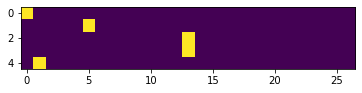

In [28]:
plt.imshow(xenc)

In [29]:
xenc.dtype

torch.float32

In [30]:
W = torch.randn((27,27))
xenc @ W

tensor([[-7.8409e-01,  1.2018e+00, -1.6156e-01,  1.9083e-01, -9.3905e-01,
          1.3004e-01,  1.8399e+00,  1.5971e-01, -1.4424e+00, -5.1821e-02,
          1.3749e+00,  2.8633e-01,  6.5545e-02, -1.5118e+00,  4.7728e-01,
          3.3869e-01,  4.9165e-01,  1.9971e-01,  1.1743e+00, -2.4784e-01,
          2.1330e-01, -1.1849e+00, -2.8758e+00,  1.4298e+00, -7.8843e-01,
         -2.7738e-01, -3.8148e-01],
        [ 7.8965e-01, -2.1510e-01, -2.0309e+00,  7.7212e-01, -3.2415e-01,
          1.2706e+00,  5.0553e-01,  7.8550e-01,  9.8077e-01, -8.1288e-01,
         -1.5690e-01, -2.6662e-02, -1.5783e+00,  6.8559e-01, -4.8601e-01,
         -7.0479e-01,  8.3537e-02, -1.1037e+00,  1.7636e+00, -4.6221e-01,
         -1.3353e-01,  6.1434e-01, -7.0347e-01, -2.3278e+00, -6.0660e-01,
          4.8770e-01,  4.7830e-01],
        [ 1.5540e-01, -4.9358e-01,  6.8287e-01,  5.6834e-01, -7.0504e-01,
          7.7480e-01,  1.0142e+00,  8.9353e-01, -1.1660e+00, -3.7449e-01,
         -1.0927e+00, -2.9538e-01,  6.02

In [31]:
(xenc @ W)[3, 13]

tensor(0.9389)

In [32]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
W[:, 13]

tensor([-1.5118,  0.2884,  1.3576,  0.2631, -0.1148,  0.6856,  0.2747, -0.1562,
         0.8331,  0.0421,  0.4367, -0.6814,  1.2501,  0.9389, -1.9934, -0.5886,
         1.1878, -1.6198,  0.3265,  0.1981, -0.1855, -0.7291, -0.3964, -0.4718,
        -0.3114, -1.6468,  0.0196])

In [34]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn([27, 27], generator=g, requires_grad=True)

In [35]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W 
counts = logits.exp() 
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(5), ys].log().mean()

In [36]:
print(loss.item())

3.7693049907684326


In [37]:
#backward pass
loss.grad = None
loss.backward()

In [38]:
W.data += -0.1*W.grad

In [39]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item()
  y = ys[i].item() 
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
       grad_fn=<SelectBackward0>)
label (actual next characte

In [40]:
xs, ys = [], []
for w in words:
    
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [41]:
for k in range(20):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W 
    counts = logits.exp() 
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())

    # backward pass
    W.grad = None
    loss.backward()

    # update
    W.data += -50 * W.grad

3.768618583679199
3.3788065910339355
3.161090850830078
3.0271859169006348
2.9344842433929443
2.867231607437134
2.8166542053222656
2.777146339416504
2.745253801345825
2.7188305854797363
2.696505308151245
2.6773719787597656
2.6608052253723145
2.6463515758514404
2.633664846420288
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794439315796
2.5886809825897217


In [42]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probabilities for next character
        # ----------

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

moq.
axxaninaynnnyler.
kondn.
isah.
anchunizarie.
